# Handwritten Digit Classification using CNN

## Task-1 

## Data Preparation And Augmentaion

In [1]:
# required libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Preprocessing and Data augmetation
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(28, scale=(0.7, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),   
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))          
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# downloading dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=train_transform, download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=test_transform, download=True)

# loading dataset
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

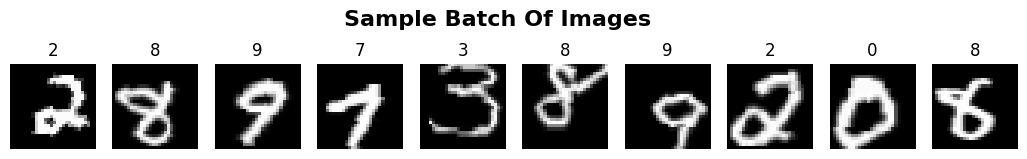

In [3]:
# Visulaizing id dataset has loaded correctly
images, labels = next(iter(trainloader))
plt.figure(figsize=(13,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(str(labels[i].item()))
    plt.axis('off')
plt.suptitle("Sample Batch Of Images", fontweight='bold', fontsize='16')
plt.show()

## Task-2

## CNN Architecture Design

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  
        x = self.pool(torch.relu(self.conv2(x)))  
        x = x.view(-1, 64 * 7 * 7)                
        x = torch.relu(self.fc1(x))                                     
        x = self.fc2(x)                           
        return self.logsoftmax(x)                 

net = Net()

In [5]:
#  Simple Model without using Module and only with Sequential

# net = nn.Sequential(

#     nn.Conv2d(1, 32, 3, padding=1),     
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),                 

#     nn.Conv2d(32, 64, 3, padding=1),    
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),                 

#     nn.Flatten(),                       

#     nn.Linear(64 * 7 * 7, 128),         
#     nn.ReLU(),                   

#     nn.Linear(128, 10),                 
#     nn.LogSoftmax(dim=1)                
# )


## Task-3

## Model Training And Evaluation

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    # training/validation loss
    net.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(testloader)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1}: Training Loss={avg_train_loss:.4f}, Validation Loss={avg_val_loss:.4f}")

## Task-4

## Analysis And Conclusion

In [ ]:
# Final Accuracy

net.eval()
correct = 0
total = 0
trained = []
labelled = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        trained.extend(predicted.cpu().numpy())
        labelled.extend(labels.cpu().numpy())
test_accuracy = 100 * correct / total
print(f"Final Test Accuracy: {test_accuracy:.2f}%")

In [ ]:
# Confusion Matrix
cm = confusion_matrix(labelled, trained)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='gray')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()